In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config Completer.use_jedi = False

In [69]:
data = pd.read_csv("datasets/BRITANNIA.csv")
print(data.head())

         Date     Symbol Series  Prev Close   Open    High    Low   Last  \
0  2000-01-03  BRITANNIA     EQ      703.25  705.0  759.50  705.0  758.0   
1  2000-01-04  BRITANNIA     EQ      756.90  710.0  770.00  710.0  740.0   
2  2000-01-05  BRITANNIA     EQ      754.55  755.0  759.00  705.0  740.0   
3  2000-01-06  BRITANNIA     EQ      735.30  740.0  794.15  740.0  770.0   
4  2000-01-07  BRITANNIA     EQ      785.65  808.0  848.50  798.0  848.5   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  756.90  741.01    7512  5.566488e+11     NaN                 NaN   
1  754.55  742.52    8135  6.040391e+11     NaN                 NaN   
2  735.30  739.92    6095  4.509784e+11     NaN                 NaN   
3  785.65  788.83   19697  1.553756e+12     NaN                 NaN   
4  848.50  827.53   33107  2.739708e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


In [70]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [71]:
data.index = data['Date']

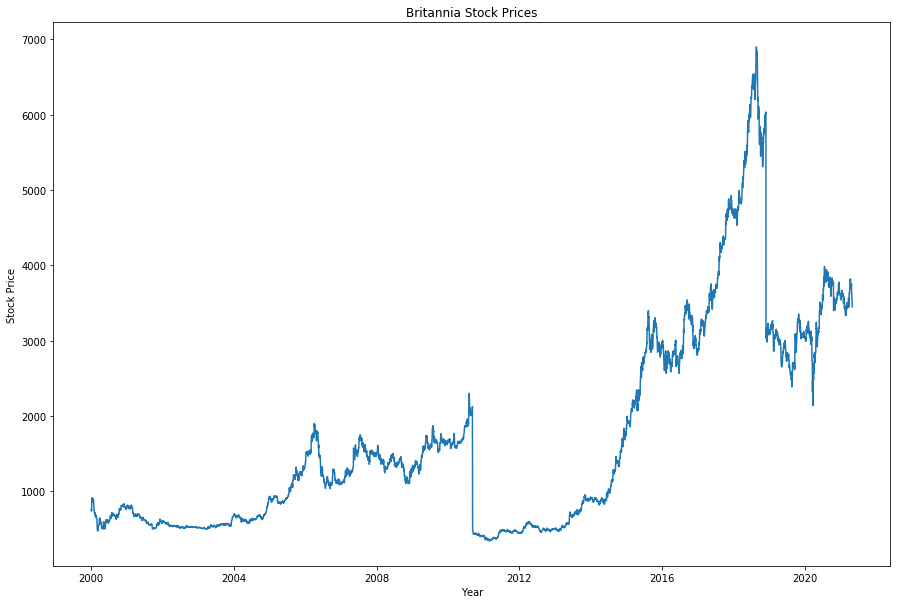

In [72]:
plt.figure(figsize=(15,10))
plt.plot(data['Close'])
plt.title("Britannia Stock Prices")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.show()

In [73]:
X = data[['Open','High','Low','Last','Volume']]
print(X)

               Open     High     Low    Last   Volume
Date                                                 
2000-01-03   705.00   759.50   705.0   758.0     7512
2000-01-04   710.00   770.00   710.0   740.0     8135
2000-01-05   755.00   759.00   705.0   740.0     6095
2000-01-06   740.00   794.15   740.0   770.0    19697
2000-01-07   808.00   848.50   798.0   848.5    33107
...             ...      ...     ...     ...      ...
2021-04-26  3661.10  3662.00  3531.0  3546.0  1031406
2021-04-27  3572.70  3574.60  3517.0  3546.0   813608
2021-04-28  3488.00  3527.00  3469.0  3470.0  1498181
2021-04-29  3496.75  3505.90  3447.0  3464.0   611087
2021-04-30  3460.00  3468.35  3437.0  3444.8   436187

[5305 rows x 5 columns]


In [74]:
y = data[['Close']]
print(y)

              Close
Date               
2000-01-03   756.90
2000-01-04   754.55
2000-01-05   735.30
2000-01-06   785.65
2000-01-07   848.50
...             ...
2021-04-26  3539.20
2021-04-27  3541.20
2021-04-28  3478.75
2021-04-29  3468.90
2021-04-30  3449.00

[5305 rows x 1 columns]


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred = lm.predict(X_test)

In [78]:
print(y_pred)

[[2956.42875704]
 [3000.33948051]
 [3081.00712674]
 ...
 [3475.23253893]
 [3464.56123478]
 [3445.03820398]]


In [79]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

92.75821106640403


In [80]:
y_pred = pd.DataFrame(data=y_pred, index=y_test.index)
print(y_pred)

                      0
Date                   
2017-01-16  2956.428757
2017-01-17  3000.339481
2017-01-18  3081.007127
2017-01-19  3106.957367
2017-01-20  3079.590931
...                 ...
2021-04-26  3551.773158
2021-04-27  3543.876734
2021-04-28  3475.232539
2021-04-29  3464.561235
2021-04-30  3445.038204

[1061 rows x 1 columns]


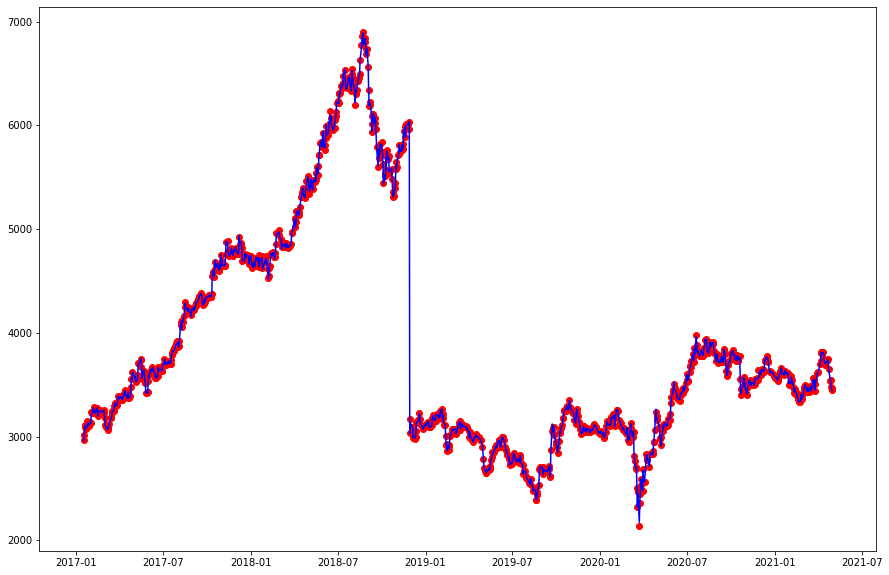

In [81]:
plt.figure(figsize=(15,10))
plt.scatter(y_test.index, y_test, color="red")
plt.plot(y_pred.index, lm.predict(X_test), color="blue")

In [84]:
data2 = data[['Close']]
print(data2)

              Close
Date               
2000-01-03   756.90
2000-01-04   754.55
2000-01-05   735.30
2000-01-06   785.65
2000-01-07   848.50
...             ...
2021-04-26  3539.20
2021-04-27  3541.20
2021-04-28  3478.75
2021-04-29  3468.90
2021-04-30  3449.00

[5305 rows x 1 columns]


In [86]:
import pandas_ta

data2.ta.ema(close='Close', length=10, append=True)

print(data2)

              Close       EMA_10
Date                            
2000-01-03   756.90          NaN
2000-01-04   754.55          NaN
2000-01-05   735.30          NaN
2000-01-06   785.65          NaN
2000-01-07   848.50          NaN
...             ...          ...
2021-04-26  3539.20  3681.145594
2021-04-27  3541.20  3655.700940
2021-04-28  3478.75  3623.528042
2021-04-29  3468.90  3595.413853
2021-04-30  3449.00  3568.793152

[5305 rows x 2 columns]


C:\Users\91981\Anaconda3\lib\site-packages\pandas_ta\core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


In [88]:
data2 = data2.iloc[10:]
print(data2)

              Close       EMA_10
Date                            
2000-01-17   875.95   836.767273
2000-01-18   881.05   844.818678
2000-01-19   900.85   855.006191
2000-01-20   895.70   862.405065
2000-01-21   888.25   867.104144
...             ...          ...
2021-04-26  3539.20  3681.145594
2021-04-27  3541.20  3655.700940
2021-04-28  3478.75  3623.528042
2021-04-29  3468.90  3595.413853
2021-04-30  3449.00  3568.793152

[5295 rows x 2 columns]


In [89]:
X_train, X_test, y_train, y_test = train_test_split(data2[['Close']], data2[['EMA_10']], test_size=0.2, shuffle=False, random_state=42)

In [92]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_pred = lm.predict(X_test)

In [94]:
mean_squared_error(y_test,y_pred)

22968.778925266797

In [98]:
plt.figure(figsize=(15,10))
# plt.scatter(y_test.index, y_test, color="red")
# plt.plot(y_test.index, lm.predict(X_test), color="blue")

plt.plot(y_test)
plt.plot(y_pred)

ValueError: view limit minimum -36895.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units